# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
from pprint import pprint
from datetime import date

# Import API key
sys.path.append("../Resources")
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [106]:
# Specify url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Initialize lists of data of interest
city_ls = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date_ls = []

print("Beginning Data Retrieval\n-------------------")
counter = 0
for city in cities:
    # Update counter
    counter += 1
    
    # Print progress message
    print(f"Processing Record {counter} | {city}")
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    query_url
    
    try:
        # Run API call
        weather_response = requests.get(query_url).json()
        
        # Extract data of interest
        city_ls.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date_ls.append(weather_response['dt'])
        
    except:
        # Print error and continue
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-------------------
Processing Record 1 | new norfolk
Processing Record 2 | codrington
Processing Record 3 | tsihombe
City not found. Skipping...
Processing Record 4 | ponta do sol
Processing Record 5 | avarua
Processing Record 6 | pevek
Processing Record 7 | upernavik
Processing Record 8 | dakar
Processing Record 9 | nikolskoye
Processing Record 10 | souillac
Processing Record 11 | agirish
Processing Record 12 | laguna
Processing Record 13 | ilulissat
Processing Record 14 | high rock
Processing Record 15 | boende
Processing Record 16 | busselton
Processing Record 17 | langxiang
Processing Record 18 | masuguru
Processing Record 19 | yithion
City not found. Skipping...
Processing Record 20 | shatin
Processing Record 21 | poum
Processing Record 22 | atuona
Processing Record 23 | cape town
Processing Record 24 | puerto ayora
Processing Record 25 | nantucket
Processing Record 26 | rikitea
Processing Record 27 | thompson
Processing Record 28 | punta arenas
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
# Create df from lists
weather_dict = {
    "City": city_ls,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date_ls
    
}
weather_data = pd.DataFrame(weather_dict)

# Convert temp to farenheit
weather_data['Max Temp'] = (weather_data['Max Temp'] - 273.15) * 9/5 + 32

# Export to csv
weather_data.to_csv("weather_data.csv")

In [108]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,59.720,64,83,1.00,AU,1648412263
1,Codrington,-38.2667,141.9667,60.980,87,95,1.64,AU,1648412263
2,Ponta do Sol,32.6667,-17.1000,62.060,80,17,2.63,PT,1648412264
3,Avarua,-21.2078,-159.7750,84.254,79,59,3.60,CK,1648412126
4,Pevek,69.7008,170.3133,-17.356,100,62,3.04,RU,1648412264


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [109]:
weather_data[weather_data['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [110]:
#  Get the indices of cities that have humidity over 100%.

In [111]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,59.720,64,83,1.00,AU,1648412263
1,Codrington,-38.2667,141.9667,60.980,87,95,1.64,AU,1648412263
2,Ponta do Sol,32.6667,-17.1000,62.060,80,17,2.63,PT,1648412264
3,Avarua,-21.2078,-159.7750,84.254,79,59,3.60,CK,1648412126
4,Pevek,69.7008,170.3133,-17.356,100,62,3.04,RU,1648412264


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

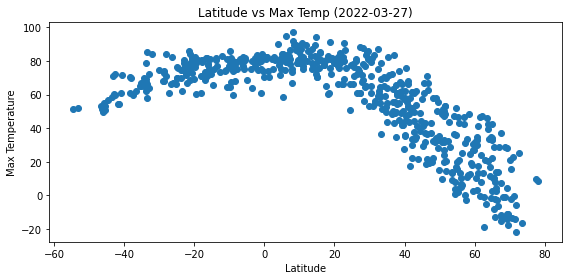

In [114]:
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.title(f"Latitude vs Max Temp ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.tight_layout()
plt.savefig("lat_vs_max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

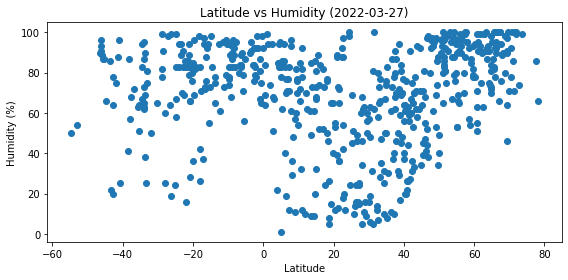

In [115]:
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.title(f"Latitude vs Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

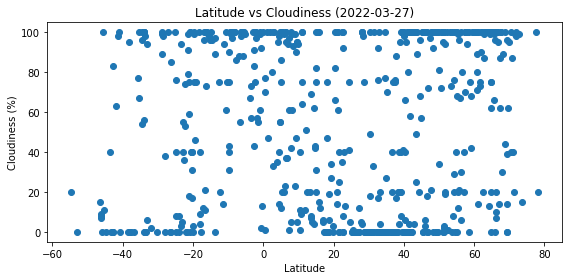

In [116]:
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.title(f"Latitude vs Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.savefig("lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

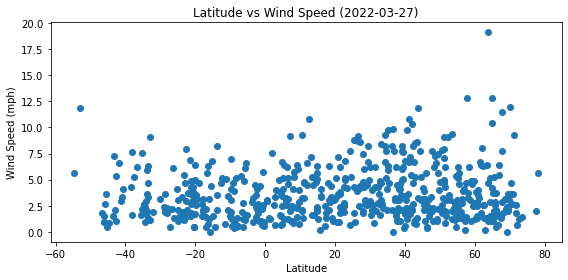

In [117]:
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"])
plt.title(f"Latitude vs Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.savefig("lat_vs_wind_speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.874673131422385


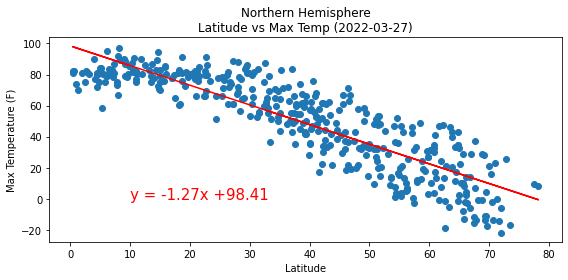

In [118]:
# Subset norhtern hemisphere
clean_city_data_nhemp = clean_city_data[clean_city_data['Lat'] > 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_nhemp['Lat'], clean_city_data_nhemp['Max Temp'])
regress_values = clean_city_data_nhemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_nhemp["Lat"], clean_city_data_nhemp["Max Temp"])
axes.plot(clean_city_data_nhemp["Lat"], regress_values, "r-")
plt.title(f"Northern Hemisphere\nLatitude vs Max Temp ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq, (10, 0), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_max_temp_nhemp_withcorr.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6515967283023503


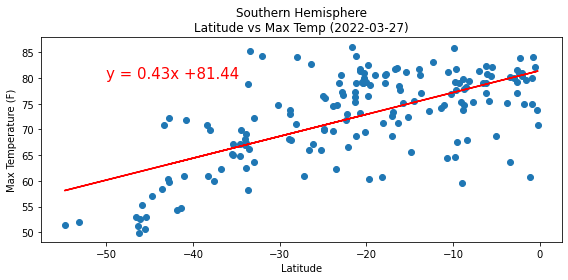

In [119]:
# Subset norhtern hemisphere
clean_city_data_shemp = clean_city_data[clean_city_data['Lat'] < 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_shemp['Lat'], clean_city_data_shemp['Max Temp'])
regress_values = clean_city_data_shemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_shemp["Lat"], clean_city_data_shemp["Max Temp"])
axes.plot(clean_city_data_shemp["Lat"], regress_values, "r-")
plt.title(f"Southern Hemisphere\nLatitude vs Max Temp ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_max_temp_shemp_withcorr.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3723110775514335


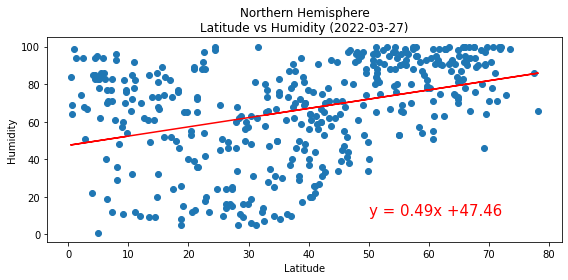

In [120]:
# Subset norhtern hemisphere
clean_city_data_nhemp = clean_city_data[clean_city_data['Lat'] > 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_nhemp['Lat'], clean_city_data_nhemp['Humidity'])
regress_values = clean_city_data_nhemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_nhemp["Lat"], clean_city_data_nhemp["Humidity"])
axes.plot(clean_city_data_nhemp["Lat"], regress_values, "r-")
plt.title(f"Northern Hemisphere\nLatitude vs Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (50, 10), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_humidity_nhemp_withcorr.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.28157650353528124


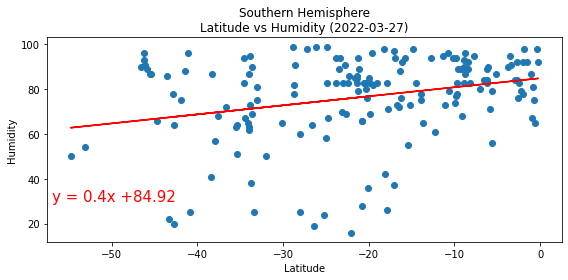

In [121]:
# Subset norhtern hemisphere
clean_city_data_shemp = clean_city_data[clean_city_data['Lat'] < 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_shemp['Lat'], clean_city_data_shemp['Humidity'])
regress_values = clean_city_data_shemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_shemp["Lat"], clean_city_data_shemp["Humidity"])
axes.plot(clean_city_data_shemp["Lat"], regress_values, "r-")
plt.title(f"Southern Hemisphere\nLatitude vs Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-57, 30), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_humidity_shemp_withcorr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17860052819971353


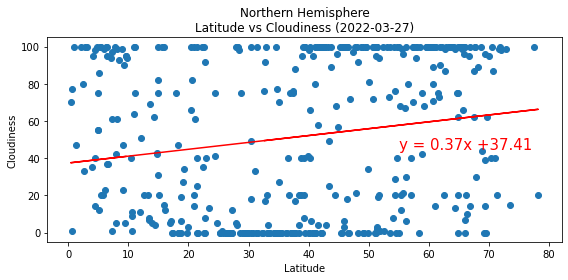

In [122]:
# Subset norhtern hemisphere
clean_city_data_nhemp = clean_city_data[clean_city_data['Lat'] > 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_nhemp['Lat'], clean_city_data_nhemp['Cloudiness'])
regress_values = clean_city_data_nhemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_nhemp["Lat"], clean_city_data_nhemp["Cloudiness"])
axes.plot(clean_city_data_nhemp["Lat"], regress_values, "r-")
plt.title(f"Northern Hemisphere\nLatitude vs Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (55, 45), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_cloudiness_nhemp_withcorr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.395349671114928


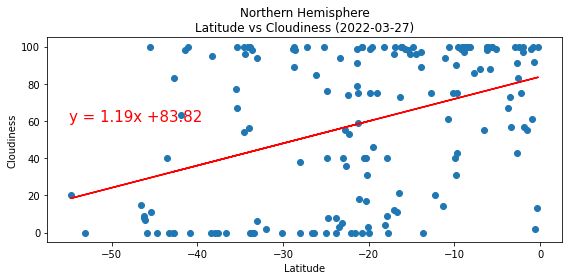

In [123]:
# Subset norhtern hemisphere
clean_city_data_shemp = clean_city_data[clean_city_data['Lat'] < 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_shemp['Lat'], clean_city_data_shemp['Cloudiness'])
regress_values = clean_city_data_shemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_shemp["Lat"], clean_city_data_shemp["Cloudiness"])
axes.plot(clean_city_data_shemp["Lat"], regress_values, "r-")
plt.title(f"Northern Hemisphere\nLatitude vs Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-55, 60), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_cloudiness_shemp_withcorr.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011738466805724285


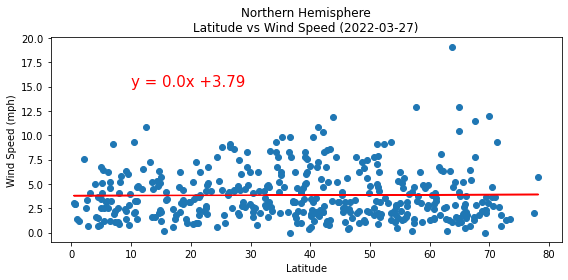

In [124]:
# Subset norhtern hemisphere
clean_city_data_nhemp = clean_city_data[clean_city_data['Lat'] > 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_nhemp['Lat'], clean_city_data_nhemp['Wind Speed'])
regress_values = clean_city_data_nhemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_nhemp["Lat"], clean_city_data_nhemp["Wind Speed"])
axes.plot(clean_city_data_nhemp["Lat"], regress_values, "r-")
plt.title(f"Northern Hemisphere\nLatitude vs Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_wind_speed_nhemp_withcorr.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16756170209442986


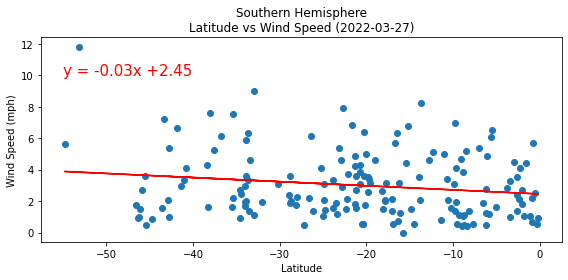

In [125]:
# Subset norhtern hemisphere
clean_city_data_shemp = clean_city_data[clean_city_data['Lat'] < 0]

# Calculate stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_shemp['Lat'], clean_city_data_shemp['Wind Speed'])
regress_values = clean_city_data_shemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Generate plot
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.scatter(clean_city_data_shemp["Lat"], clean_city_data_shemp["Wind Speed"])
axes.plot(clean_city_data_shemp["Lat"], regress_values, "r-")
plt.title(f"Southern Hemisphere\nLatitude vs Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-55, 10), fontsize=15, color="red")
plt.tight_layout()
plt.savefig("lat_vs_wind_speed_shemp_withcorr.png")
plt.show()